In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from keras import metrics
from sklearn.metrics import confusion_matrix
import os
import glob #moduł służący do przeszukiwania folderów
import cv2 #moduł ułatwiający przetwarzanie obrazów

Apple


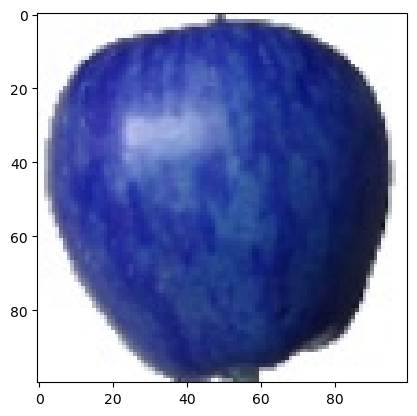

In [3]:
x = []
y = []
classes = ['Apple Red 1', 'Banana', 'Orange', 'Avocado', 'Blueberry', 'Cocos', 'Corn', 'Cucumber Ripe', 'Lemon', 'Mango', 'Onion White',
          'Pear', 'Plum', 'Stawberry', 'Tomato 1', 'Watermelon'] #klasy, które zostaną użyte w modelu

for path in glob.glob("C:/Python/AAA studia pjatk/SEM_2/WUM/Projekt/fruits_360/fruits-360_dataset/fruits-360/Training/*"):
        image_label = path.split("\\")[-1]
        main_label = image_label.split(' ')[0]
        if image_label in classes:
            for img_path in glob.glob(os.path.join(path, "*.jpg")):
                img = cv2.imread(img_path)
                x.append(img)
                y.append(main_label)
            
for path in glob.glob("C:/Python/AAA studia pjatk/SEM_2/WUM/Projekt/fruits_360/fruits-360_dataset/fruits-360/Test/*"):
        image_label = path.split("\\")[-1]
        main_label = image_label.split(' ')[0]
        if image_label in classes:
            for img_path in glob.glob(os.path.join(path, "*.jpg")):
                img = cv2.imread(img_path)
                x.append(img)
                y.append(main_label)
plt.imshow(x[190])
print(y[190])            

In [4]:
#zmiana listy na tablice
x = np.array(x) 
y = np.array(y)
y.shape, x.shape

((9681,), (9681, 100, 100, 3))

In [5]:
x_reshaped = x/255 #Zmiana RGB na wartości z zakresu 0-1
y_reshaped = y
y_reshaped.shape, x_reshaped.shape

((9681,), (9681, 100, 100, 3))

In [6]:
unique_train, counts_train = np.unique(y_reshaped, return_counts=True) #zliczanie danych treningowych

dict(zip(unique_train, counts_train))

{'Apple': 656,
 'Avocado': 570,
 'Banana': 656,
 'Blueberry': 616,
 'Cocos': 656,
 'Corn': 600,
 'Cucumber': 522,
 'Lemon': 656,
 'Mango': 656,
 'Onion': 584,
 'Orange': 639,
 'Pear': 656,
 'Plum': 598,
 'Tomato': 984,
 'Watermelon': 632}

In [7]:
from sklearn.model_selection import train_test_split

# Podział na dane treningowe (70%) i testowe + walidacyjne (30%)
x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Podział danych testowych + walidacyjnych na dane testowe (50%) i walidacyjne (50%)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

In [8]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(dict(zip(unique_train, counts_train)))

unique_test, counts_test = np.unique(y_test, return_counts=True)
print(dict(zip(unique_test, counts_test)))

unique_val, counts_val = np.unique(y_val, return_counts=True)
print(dict(zip(unique_val, counts_val)))

{'Apple': 459, 'Avocado': 399, 'Banana': 459, 'Blueberry': 431, 'Cocos': 459, 'Corn': 420, 'Cucumber': 366, 'Lemon': 459, 'Mango': 459, 'Onion': 409, 'Orange': 447, 'Pear': 459, 'Plum': 419, 'Tomato': 689, 'Watermelon': 442}
{'Apple': 99, 'Avocado': 86, 'Banana': 98, 'Blueberry': 93, 'Cocos': 98, 'Corn': 90, 'Cucumber': 78, 'Lemon': 98, 'Mango': 98, 'Onion': 88, 'Orange': 96, 'Pear': 98, 'Plum': 90, 'Tomato': 147, 'Watermelon': 95}
{'Apple': 98, 'Avocado': 85, 'Banana': 99, 'Blueberry': 92, 'Cocos': 99, 'Corn': 90, 'Cucumber': 78, 'Lemon': 99, 'Mango': 99, 'Onion': 87, 'Orange': 96, 'Pear': 99, 'Plum': 89, 'Tomato': 148, 'Watermelon': 95}


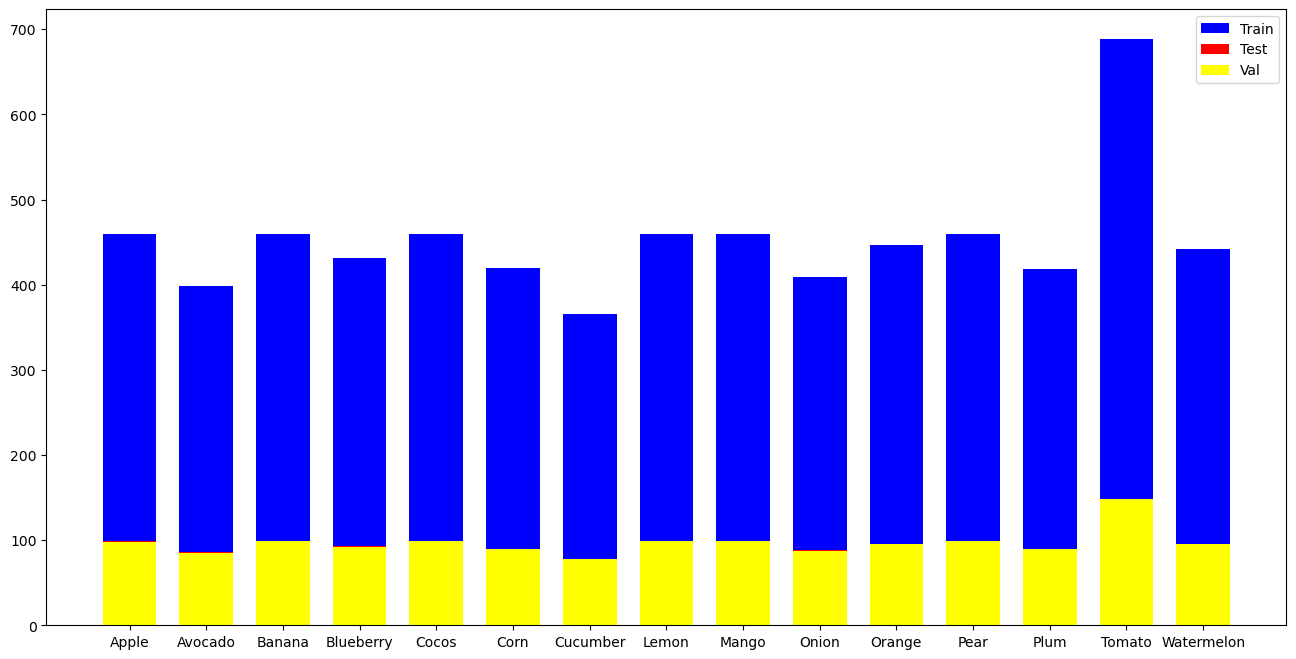

In [50]:
plt.figure(figsize=(16,8))

plt.bar(unique_train, counts_train, width=0.7, label='Train', color='blue')
plt.bar(unique_test, counts_test, width=0.7, label='Test', color='red')
plt.bar(unique_val, counts_val, width=0.7, label='Val', color= 'yellow')

plt.legend()

plt.show()

In [10]:
#zmiana etykiet stringowych na tablice numeryczną?
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
#sprowadzam dane do 2-wymiarowej tablicy
ytrain_reshaped = np.array(y_train).reshape(-1, 1)
ytest_reshaped = np.array(y_test).reshape(-1, 1)
yval_reshaped = np.array(y_val).reshape(-1, 1)

In [11]:
ytrain_reshaped.shape

(6776, 1)

In [12]:
y_train = encoder.fit_transform(ytrain_reshaped)
y_test = encoder.transform(ytest_reshaped)
y_val = encoder.transform(yval_reshaped)

C:\Users\kassi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
y_train.shape, y_test.shape, y_val.shape, x_train.shape, x_test.shape, x_val.shape

((6776, 15),
 (1452, 15),
 (1453, 15),
 (6776, 100, 100, 3),
 (1452, 100, 100, 3),
 (1453, 100, 100, 3))

In [14]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [15]:
y_test.shape

(1452, 15)

In [16]:
from keras import regularizers

In [24]:
#model1 - jedna warstwa, bez regularyzacji

epochs = 30
bsize = 32
num_classes = y_train.shape[1]

model = models.Sequential([
    
    layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(100,100,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

history = model.fit(x_train, y_train, epochs = epochs, batch_size = bsize, validation_data=(x_val, y_val))

Epoch 1/30
212/212 [==============================] - 10s 44ms/step - loss: 45.5446 - accuracy: 0.7097 - precision_5: 0.8023 - recall_5: 0.6449 - val_loss: 0.4955 - val_accuracy: 0.8940 - val_precision_5: 0.9667 - val_recall_5: 0.8204
Epoch 2/30
212/212 [==============================] - 9s 42ms/step - loss: 0.2693 - accuracy: 0.9692 - precision_5: 0.9889 - recall_5: 0.8964 - val_loss: 0.2646 - val_accuracy: 0.9745 - val_precision_5: 0.9844 - val_recall_5: 0.9105
Epoch 3/30
212/212 [==============================] - 9s 41ms/step - loss: 0.2024 - accuracy: 0.9827 - precision_5: 0.9919 - recall_5: 0.9190 - val_loss: 0.2089 - val_accuracy: 0.9842 - val_precision_5: 0.9881 - val_recall_5: 0.9167
Epoch 4/30
212/212 [==============================] - 9s 42ms/step - loss: 0.1557 - accuracy: 0.9973 - precision_5: 0.9992 - recall_5: 0.9308 - val_loss: 0.1544 - val_accuracy: 0.9959 - val_precision_5: 0.9985 - val_recall_5: 0.9305
Epoch 5/30
212/212 [==============================] - 9s 42ms/step

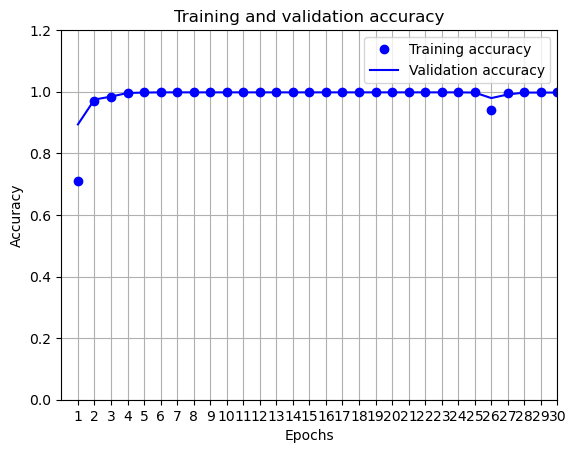

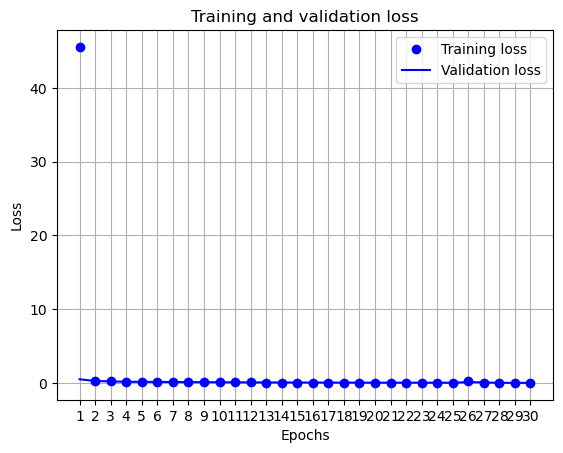

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 38416)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                2458688   
                                                                 
 dense_11 (Dense)            (None, 15)                975       
                                                                 
Total params: 2,460,111
Trainable params: 2,460,111
Non-trainable params: 0
____________________________________________

In [25]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, 30)  
plt.ylim(0, 1.2)
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()
model.summary()

print('Results of evaluation = ')
predicted = model.evaluate(x_test, y_test)

In [26]:
#model 2 - jedna warstwa, dodanie dropout oraz zmniejszenie validation_split, dodanie regularyzacji l2, zabawa parametrami

epochs = 30
bsize = 32
num_classes = y_train.shape[1]

model2 = models.Sequential([
    
    layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(100,100,3), kernel_regularizer=regularizers.l1(0.1)),
#     layers.Dropout(0.1),
    layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.15),
    
    layers.Conv2D(32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l1(0.1)),
#     layers.Dropout(0.1),
    layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.15),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes, activation='softmax')
    
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

history2 = model2.fit(x_train, y_train, epochs = epochs, batch_size = bsize, validation_data=(x_val, y_val))

Epoch 1/30
212/212 [==============================] - 12s 53ms/step - loss: 18.9799 - accuracy: 0.0757 - precision_6: 0.2298 - recall_6: 0.0210 - val_loss: 7.5007 - val_accuracy: 0.1686 - val_precision_6: 0.6407 - val_recall_6: 0.1019
Epoch 2/30
212/212 [==============================] - 11s 53ms/step - loss: 6.1316 - accuracy: 0.1563 - precision_6: 0.7133 - recall_6: 0.0903 - val_loss: 5.1224 - val_accuracy: 0.1700 - val_precision_6: 0.8655 - val_recall_6: 0.1019
Epoch 3/30
212/212 [==============================] - 11s 52ms/step - loss: 4.7271 - accuracy: 0.1576 - precision_6: 0.7234 - recall_6: 0.0903 - val_loss: 4.3954 - val_accuracy: 0.1762 - val_precision_6: 0.9024 - val_recall_6: 0.1019
Epoch 4/30
212/212 [==============================] - 11s 54ms/step - loss: 4.0969 - accuracy: 0.1585 - precision_6: 0.7249 - recall_6: 0.0925 - val_loss: 3.7987 - val_accuracy: 0.1796 - val_precision_6: 0.8268 - val_recall_6: 0.1019
Epoch 5/30
212/212 [==============================] - 11s 52ms/

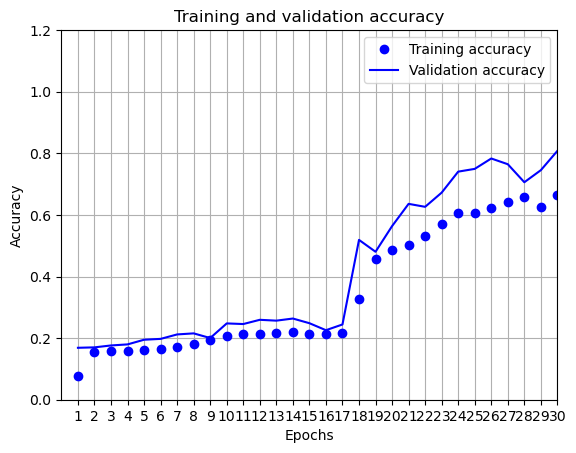

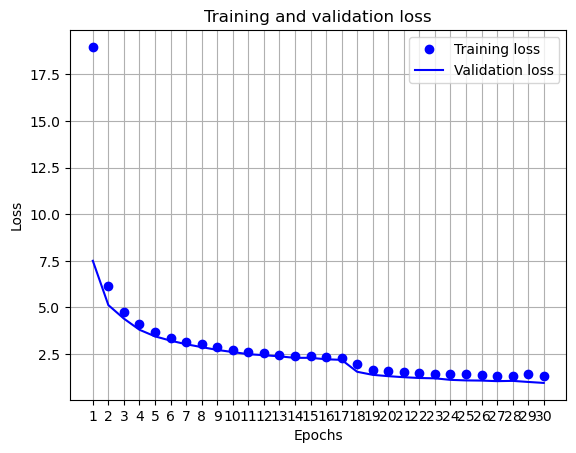

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 16928)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

[0.9525138735771179, 0.7988981008529663, 0.932812511920929, 0.4111570119857788]

In [27]:
history_dict2 = history2.history
acc = history_dict2['accuracy']
val_acc = history_dict2['val_accuracy']
loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, 30)  
plt.ylim(0, 1.2)
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()
model2.summary()

print('Results of evaluation = ')
model2.evaluate(x_test, y_test)

In [28]:
#model 3 - kolejna warstwa CN
#dodanie dodatkowej warstwy, dodanie do niej regularyzacji, batchNormalization, paddingu, zabawa parametrami

epochs = 30
bsize = 64
num_classes = y_train.shape[1]

model3 = models.Sequential([
    
    layers.Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(100,100,3), kernel_regularizer=regularizers.l2(0.1)),
#     layers.Dropout(0.3),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, kernel_size=3, activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.1)),
#     layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.2),
    
    layers.Conv2D(64, kernel_size=3, activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.1)),
#     layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    layers.Dropout(0.1),
    layers.Dense(num_classes, activation='softmax')
    
])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

history3 = model3.fit(x_train, y_train, epochs = epochs, batch_size = bsize, validation_data=(x_val, y_val))

Epoch 1/30
106/106 [==============================] - 13s 119ms/step - loss: 20.6797 - accuracy: 0.5577 - precision_7: 0.8018 - recall_7: 0.4560 - val_loss: 10.8886 - val_accuracy: 0.8176 - val_precision_7: 0.9689 - val_recall_7: 0.7075
Epoch 2/30
106/106 [==============================] - 13s 121ms/step - loss: 9.3182 - accuracy: 0.8079 - precision_7: 0.9725 - recall_7: 0.7627 - val_loss: 7.8244 - val_accuracy: 0.8589 - val_precision_7: 0.9873 - val_recall_7: 0.8548
Epoch 3/30
106/106 [==============================] - 13s 121ms/step - loss: 6.8782 - accuracy: 0.9047 - precision_7: 0.9710 - recall_7: 0.8794 - val_loss: 5.8781 - val_accuracy: 0.9945 - val_precision_7: 0.9993 - val_recall_7: 0.9904
Epoch 4/30
106/106 [==============================] - 13s 118ms/step - loss: 5.3834 - accuracy: 0.9464 - precision_7: 0.9776 - recall_7: 0.9329 - val_loss: 4.6687 - val_accuracy: 0.9986 - val_precision_7: 0.9986 - val_recall_7: 0.9966
Epoch 5/30
106/106 [==============================] - 13s 

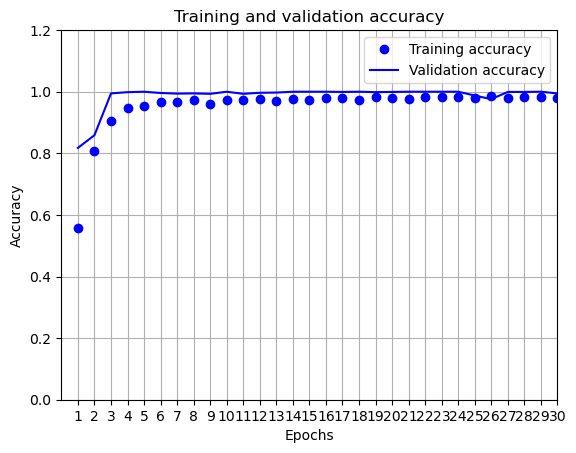

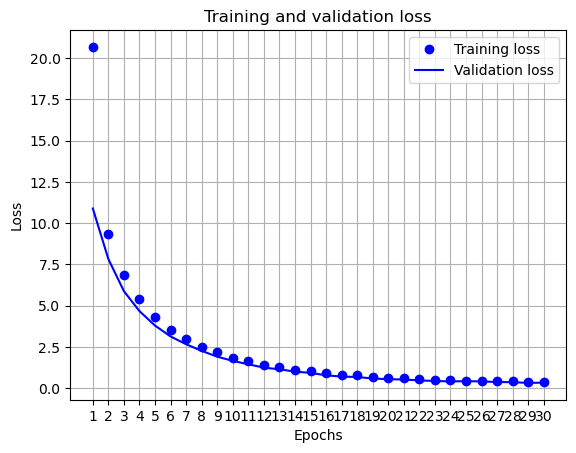

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 16928)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

[0.33774489164352417,
 0.9958677887916565,
 0.9958677887916565,
 0.9958677887916565]

In [29]:
history_dict3 = history3.history
acc = history_dict3['accuracy']
val_acc = history_dict3['val_accuracy']
loss_values = history_dict3['loss']
val_loss_values = history_dict3['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, 30)  
plt.ylim(0, 1.2)
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()
model2.summary()

print('Results of evaluation = ')
model3.evaluate(x_test, y_test)

In [30]:
#Model baseline

In [31]:
x_train.shape

(6776, 100, 100, 3)

In [32]:
x_train_base = x_train.reshape(x_train.shape[0], -1)
x_val_base = x_val.reshape(x_val.shape[0], -1)
x_train_base.shape
x_val_base.shape

(1453, 30000)

Epoch 1/30
212/212 [==============================] - 7s 28ms/step - loss: 715.3666 - accuracy: 0.6591 - precision_16: 0.6591 - recall_16: 0.6591 - val_loss: 5.2192 - val_accuracy: 0.9587 - val_precision_16: 0.9587 - val_recall_16: 0.9587
Epoch 2/30
212/212 [==============================] - 6s 27ms/step - loss: 36.9740 - accuracy: 0.8793 - precision_16: 0.8793 - recall_16: 0.8793 - val_loss: 5.5335 - val_accuracy: 0.9677 - val_precision_16: 0.9677 - val_recall_16: 0.9677
Epoch 3/30
212/212 [==============================] - 6s 28ms/step - loss: 18.9596 - accuracy: 0.9419 - precision_16: 0.9419 - recall_16: 0.9419 - val_loss: 49.6272 - val_accuracy: 0.8796 - val_precision_16: 0.8796 - val_recall_16: 0.8796
Epoch 4/30
212/212 [==============================] - 6s 27ms/step - loss: 20.6296 - accuracy: 0.9407 - precision_16: 0.9407 - recall_16: 0.9407 - val_loss: 32.4841 - val_accuracy: 0.8878 - val_precision_16: 0.8878 - val_recall_16: 0.8878
Epoch 5/30
212/212 [=========================

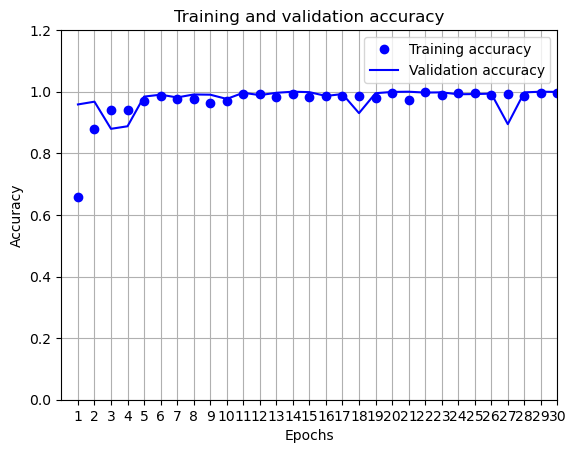

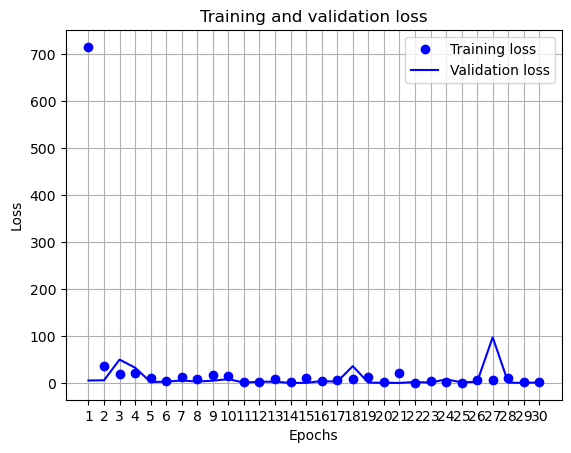

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               3840128   
                                                                 
 dense_69 (Dense)            (None, 15)                1935      
                                                                 
Total params: 3,842,063
Trainable params: 3,842,063
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Model "podstawowy"
epochs = 30
bsize = 32

base_model = models.Sequential([
    
    layers.Dense(128, 'relu'),
    
    
    layers.Dense(num_classes, 'softmax')
])

base_model.compile(optimizer='adam', 
               loss ='categorical_crossentropy',
               metrics=['accuracy', metrics.Precision(), metrics.Recall()])
history_base = base_model.fit(x_train_base, y_train, epochs = epochs, batch_size = bsize, validation_data=(x_val_base, y_val))
base_model.summary()

history_dict_base = history_base.history
acc = history_dict_base['accuracy']
val_acc = history_dict_base['val_accuracy']
loss_values = history_dict_base['loss']
val_loss_values = history_dict_base['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, 30)  
plt.ylim(0, 1.2)
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(min(epochs), max(epochs)+1, 1))
plt.grid(True)
plt.legend()
plt.show()
base_model.summary()


In [47]:
x_test_base = x_test.reshape(x_test.shape[0], -1)
x_test_base.shape

(1452, 30000)

In [48]:
print('Results of evaluation = ')
base_model.evaluate(x_test_base, y_test)

Results of evaluation = 
46/46 [==============================] - 0s 5ms/step - loss: 1.2662 - accuracy: 0.9986 - precision_16: 0.9986 - recall_16: 0.9986


[1.2662181854248047,
 0.9986225962638855,
 0.9986225962638855,
 0.9986225962638855]